# Herramientas auxiliares

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import t as tstudent
import scipy.stats as ss
import matplotlib.pyplot as plt
from datetime import datetime, date
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Simulación de base

In [2]:
S = [[1,2,-3],[2,5,-1],[-3,-1,40]]
vMedias = [1,1,1]
Nsimul = 1000
M = np.random.multivariate_normal(vMedias,S,Nsimul)

In [3]:
B = pd.DataFrame(index=range(Nsimul),columns=["X_1","X_2","X_3"])
for i in range(len(M)):
    B.iloc[i,:] = M[i]
B[B.columns] = B[B.columns].astype(float)
B.head()

,X_1,X_2,X_3
0,0.233860,-0.586074,2.558138
1,-0.445601,-1.522556,6.880690
2,-0.327102,-2.119677,1.619661
3,-0.917268,-2.440831,10.712293
4,0.670018,-0.611210,-1.568405


In [4]:
#Exportación de base
B[["X_1","X_2","X_3"]].to_csv("C:\\Users\\ricardo\\Desktop\\ComponentesPrincipales\\BaseEjemplo_Auxiliares.csv",index=False)

# Media y varianza

In [5]:
def Media(v):
    suma = 0
    for i in range(len(v)):
        suma = suma + v[i]
    return suma/len(v)
def Varianza(v):
    suma = 0
    m, n = Media(v), len(v)
    for i in range(n):
        suma = suma + (v[i] - m)**2
    return suma/(n)
def Varianza2(v):
    suma = 0
    m, n = Media(v), len(v)
    for i in range(n):
        suma = suma + (v[i] - m)**2
    return suma/(n-1)

In [6]:
#Comparativo entre las funciones definidas y las funciones de Python
v = B["X_1"].values.tolist()
print("La media calculada con la función definida es ",Media(v))
print("La media calculada con la Python es ",np.mean(v))
print("La varianza calculada con la función definida es ",Varianza(v))
print("La varianza calculada con la Python es ",np.std(v)**2)

La media calculada con la función definida es  0.9951153097081809
La media calculada con la Python es  0.9951153097081791
La varianza calculada con la función definida es  0.9635038315443124
La varianza calculada con la Python es  0.9635038315443122


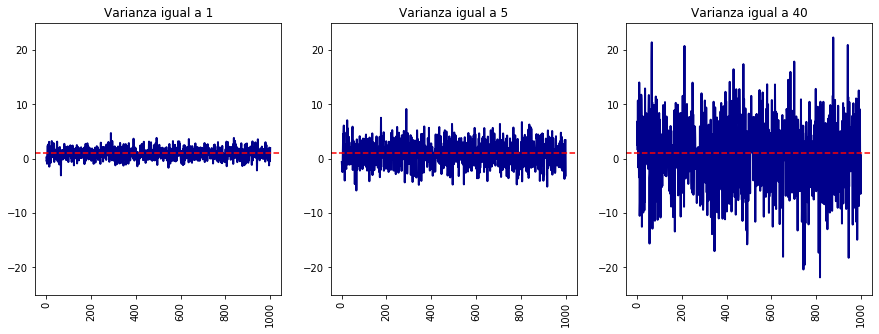

In [7]:
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,3,1)
ax.set_title("Varianza igual a 1")
ax.plot(range(1,len(B["X_1"].values)+1),B["X_1"].values,color="darkblue",linewidth=2)
plt.axhline(1,color="red",ls="--")
plt.ylim(-25,25)
plt.xticks(rotation=90)
ax = fig.add_subplot(1,3,2)
ax.set_title("Varianza igual a 5")
ax.plot(range(1,len(B["X_2"].values)+1),B["X_2"].values,color="darkblue",linewidth=2)
plt.axhline(1,color="red",ls="--")
plt.ylim(-25,25)
plt.xticks(rotation=90)
ax = fig.add_subplot(1,3,3)
ax.set_title("Varianza igual a 40")
ax.plot(range(1,len(B["X_3"].values)+1),B["X_3"].values,color="darkblue",linewidth=2)
plt.axhline(1,color="red",ls="--")
plt.ylim(-25,25)
plt.xticks(rotation=90)
plt.show()

# Covarianza

In [8]:
def Covarianza(v,w):
    m1, m2 = Media(v), Media(w)
    suma, n = 0, len(v)
    for i in range(n):
        suma = suma + (v[i] - m1)*(w[i] - m2)
    return suma/(n-1)

In [9]:
v = B["X_1"].values.tolist()
w = B["X_2"].values.tolist()
print("La covarianza calculada con la función definida es igual a ",Covarianza(v,w))
print("La covarianza calculada con Python es igual a ",np.cov(v,w)[0][1])

La covarianza calculada con la función definida es igual a  1.9810420809911684
La covarianza calculada con Python es igual a  1.9810420809911686


In [10]:
v = B["X_1"].values.tolist()
w = B["X_3"].values.tolist()
print("La covarianza calculada con la función definida es igual a ",Covarianza(v,w))
print("La covarianza calculada con Python es igual a ",np.cov(v,w)[0][1])

La covarianza calculada con la función definida es igual a  -2.6333072592877467
La covarianza calculada con Python es igual a  -2.633307259287743


# Correlación

In [11]:
def Correlación(v,w):
    C = Covarianza(v,w)
    r = C/((Varianza2(v)*Varianza2(w))**0.5)
    return r

In [12]:
v = B["X_1"].values.tolist()
w = B["X_2"].values.tolist()
print("La correlación calculada con la función definida es igual a ",Correlación(v,w))
print("La correlación calculada con Python es igual a ",ss.pearsonr(v,w)[0])

La correlación calculada con la función definida es igual a  0.8949349753846747
La correlación calculada con Python es igual a  0.8949349753846755


In [13]:
v = B["X_1"].values.tolist()
w = B["X_3"].values.tolist()
print("La correlación calculada con la función definida es igual a ",Correlación(v,w))
print("La correlación calculada con Python es igual a ",ss.pearsonr(v,w)[0])

La correlación calculada con la función definida es igual a  -0.4307263420914886
La correlación calculada con Python es igual a  -0.4307263420914881


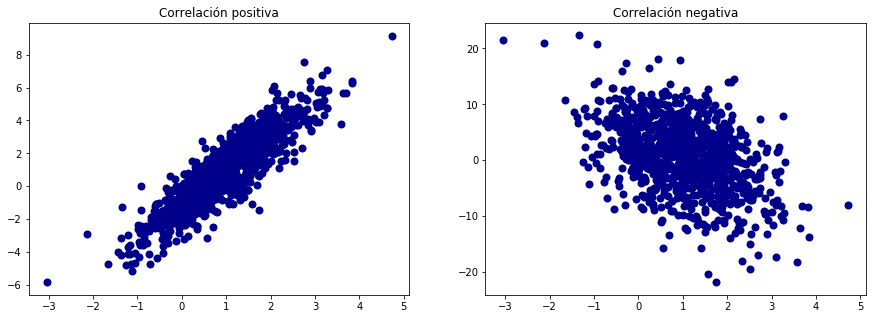

In [14]:
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,2,1)
ax.set_title("Correlación positiva")
ax.scatter(B["X_1"].values,B["X_2"].values,color="darkblue",linewidth=2)
ax = fig.add_subplot(1,2,2)
ax.set_title("Correlación negativa")
ax.scatter(B["X_1"].values,B["X_3"].values,color="darkblue",linewidth=2)
plt.show()

# Cálculos en Python (pandas)

In [15]:
B.cov()

,X_1,X_2,X_3
X_1,0.964468,1.981042,-2.633307
X_2,1.981042,5.080617,-0.309350
X_3,-2.633307,-0.309350,38.753618


In [16]:
B.corr()

,X_1,X_2,X_3
X_1,1.000000,0.894935,-0.430726
X_2,0.894935,1.000000,-0.022046
X_3,-0.430726,-0.022046,1.000000


# Matrices

In [17]:
M = [[1,2,3],[-1,2,0],[-5,7,3]]
M = np.matrix(M)
M

matrix([[ 1,  2,  3],
        [-1,  2,  0],
        [-5,  7,  3]])

In [18]:
#Tranpuesta de una matriz
N = np.transpose(M)
N

matrix([[ 1, -1, -5],
        [ 2,  2,  7],
        [ 3,  0,  3]])

In [19]:
#Función que nos proporciona las dimensiones de una matriz
n, m = M.shape
print("El número de renglones es ",n)
print("El número de columnas es ",m)

El número de renglones es  3
El número de columnas es  3


# Defina una función que realice la multiplicación de una matriz por un vector. 1) Verifique la función anterior con la matriz M = [[1,2,3],[-1,2,0],[-5,7,3]] y el vector v = [1,2,4]; 2) Verifique la función definida con la matriz M2 = [[1,1],[-2,4]] y el vector v2 = [1,1] ¿podría observarse alguna relación entre el resultado y el vector v2?